**Importation des packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.spatial.distance import cdist
from math import pi

In [2]:
# Chemin vers le fichier GZIP
gzip_file_path = "C:/Users/HanSAriEle/OneDrives/Desktop/PROJET_TUTORE/database_quality_ofair.csv.gz"

# Lire le fichier CSV directement depuis le fichier GZIP
data = pd.read_csv(gzip_file_path, compression='gzip')

# Afficher les premières lignes du DataFrame pour vérifier
data.head()

,Date,Country_Code,City,Specie,count,min,max,median,variance,Country_Name,Continent
0,2019-03-07,BR,São José dos Campos,pm25,92,5.0,114.0,42.0,5290.22,Brazil,South America
1,2019-01-08,BR,São José dos Campos,pm25,93,13.0,93.0,46.0,4324.91,Brazil,South America
2,2019-02-03,BR,São José dos Campos,pm25,91,5.0,82.0,50.0,3113.92,Brazil,South America
3,2019-02-09,BR,São José dos Campos,pm25,96,5.0,80.0,53.0,2993.53,Brazil,South America
4,2019-02-27,BR,São José dos Campos,pm25,69,5.0,65.0,30.0,1823.52,Brazil,South America


**Analyses bivariées**

In [108]:
# Transformer le DataFrame pour avoir chaque espèce comme colonne
pivot_data = data.pivot_table(index=['Date', 'City','Country_Name', 'Continent'], columns='Specie', values='max').reset_index()

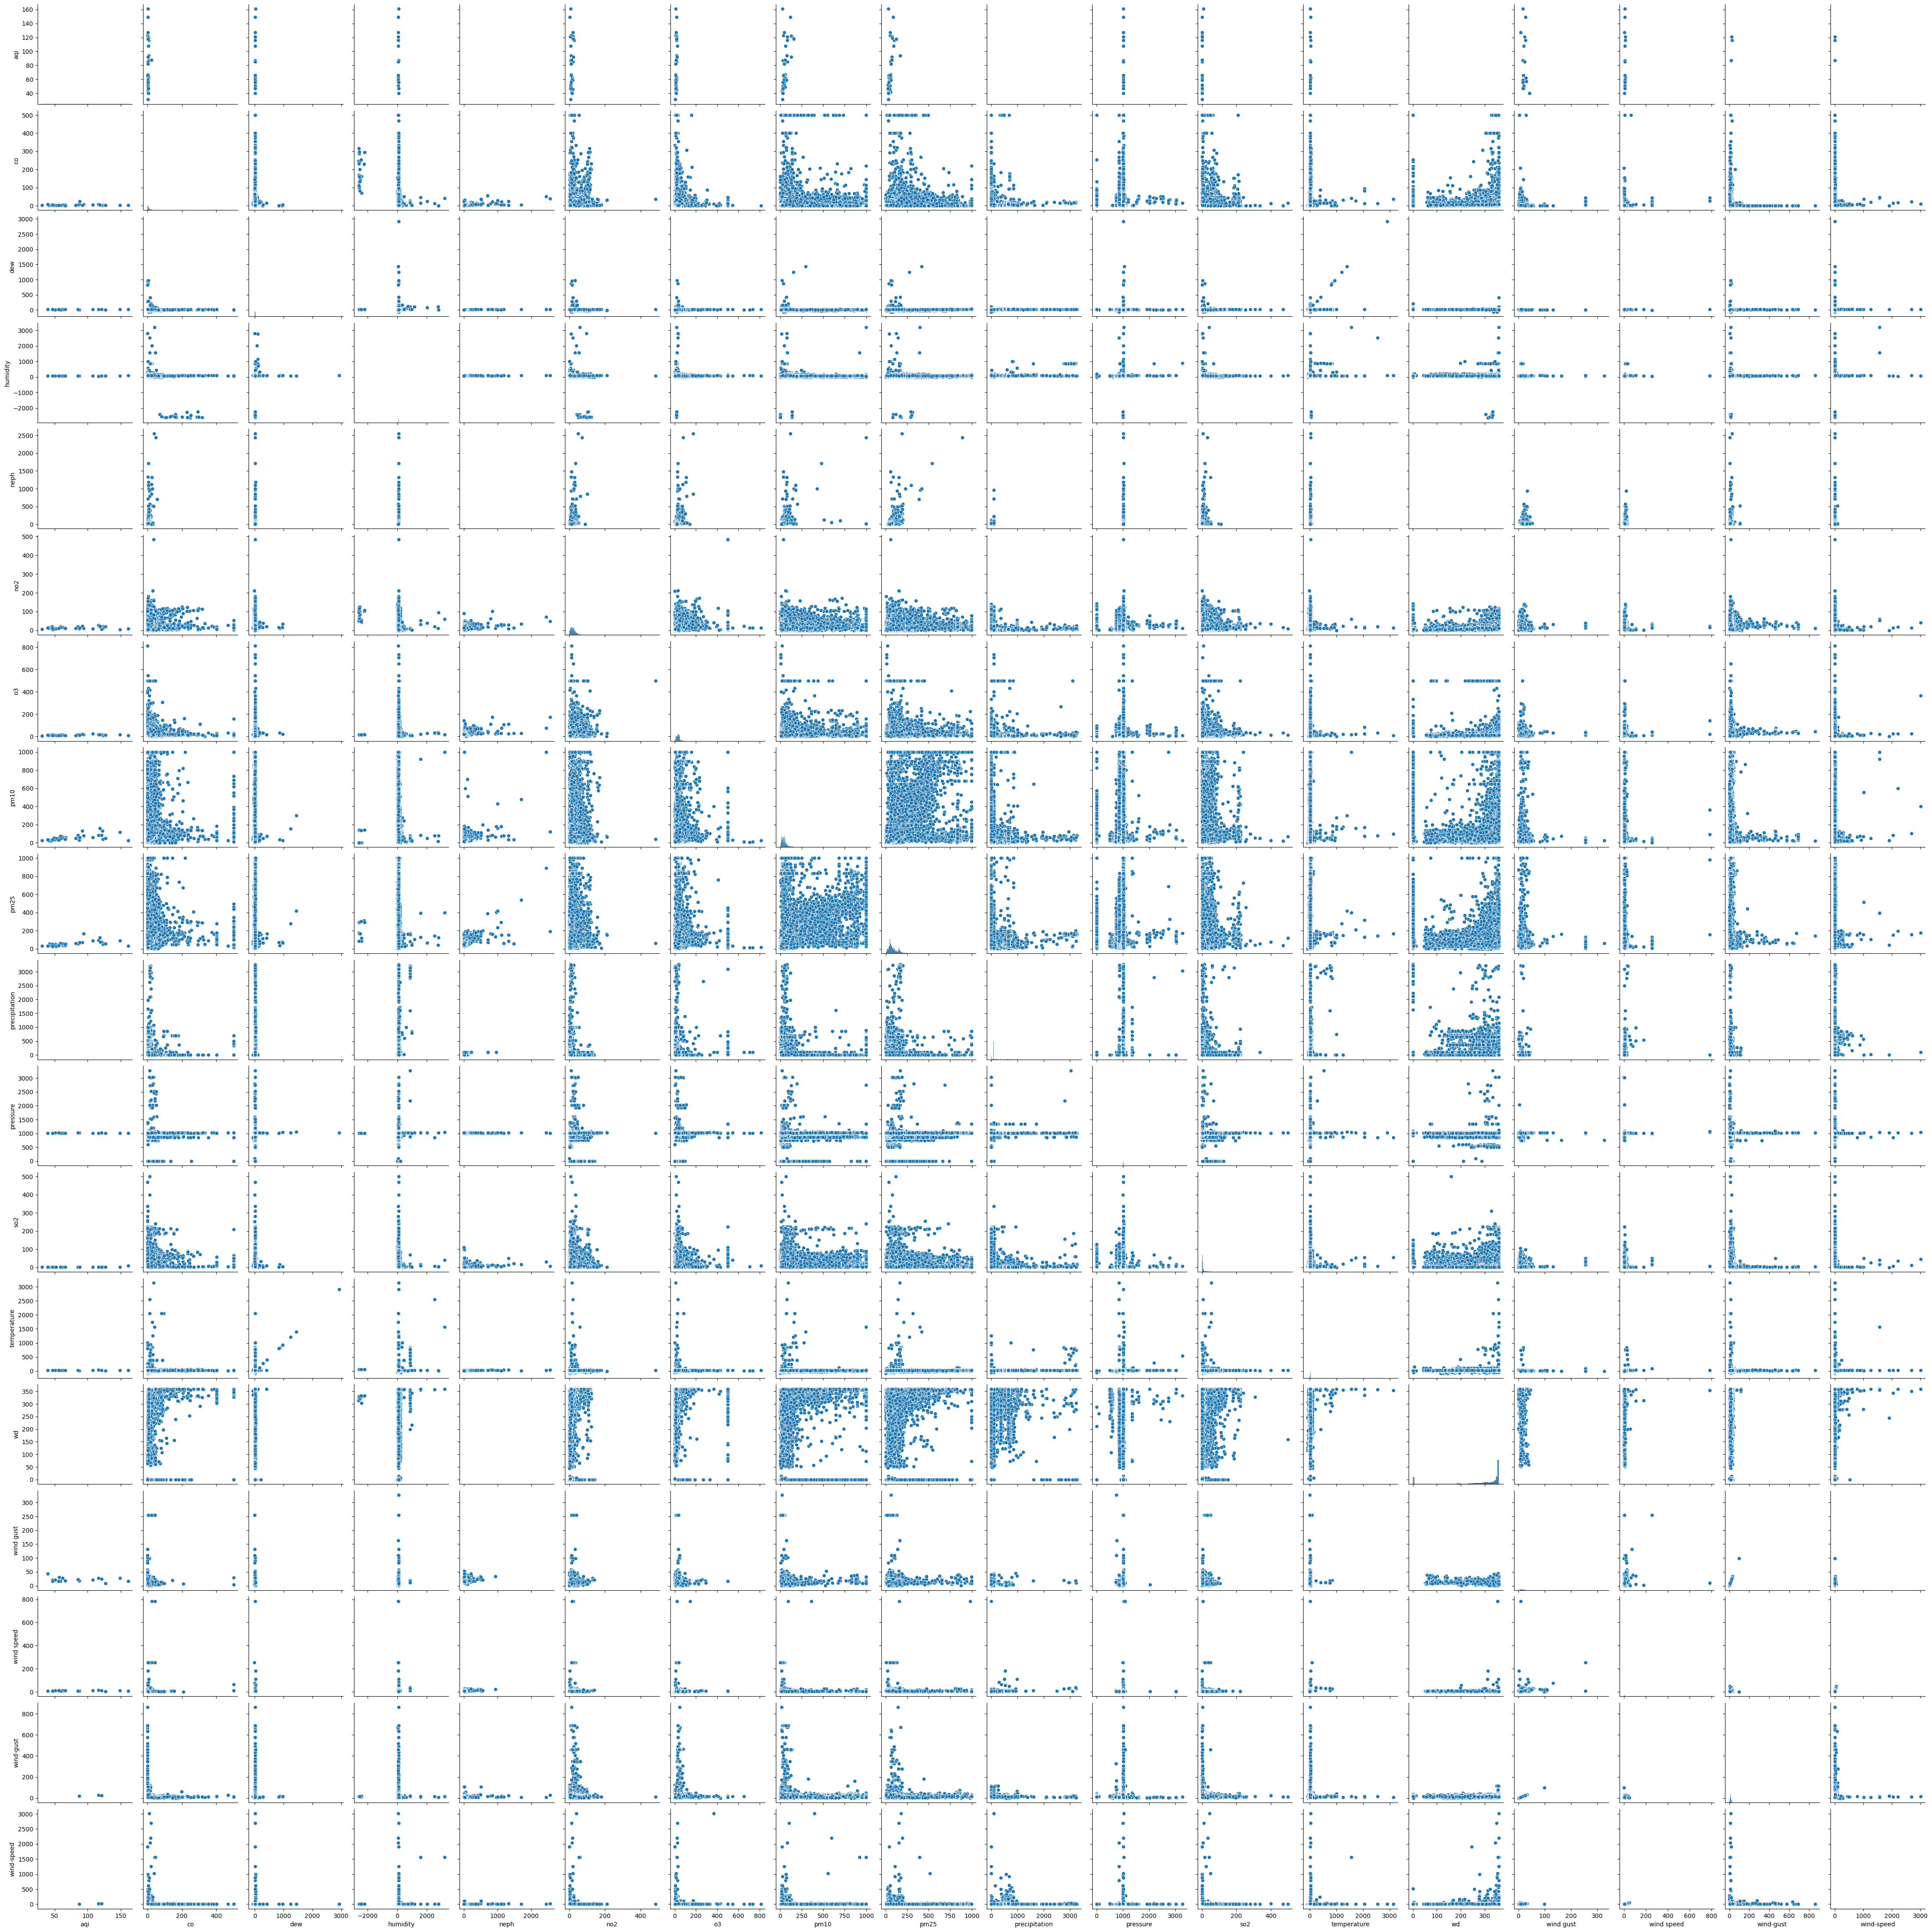

In [110]:
# Créer le pairplot sur les données pivotées
sns.pairplot(pivot_data.drop(columns=['Date']))  # On peut enlever la colonne 'Date' si elle n'est pas nécessaire
plt.show()

In [111]:
# Sélectionner uniquement les colonnes numériques
df_numeric = pivot_data.select_dtypes(include=[np.number])

# Calculer la corrélation de Spearman
correlation_spearman = df_numeric.corr(method='spearman')

# Afficher le résultat
correlation_spearman

Specie,aqi,co,dew,humidity,neph,no2,o3,pm10,pm25,precipitation,pressure,so2,temperature,wd,wind gust,wind speed,wind-gust,wind-speed
Specie,,,,,,,,,,,,,,,,,,
aqi,1.000000,0.160833,0.365199,-0.368992,NaN,0.120817,0.420784,0.626646,0.647390,NaN,-0.222627,-0.068258,0.092975,NaN,-0.179845,0.006722,0.500000,0.500000
co,0.160833,1.000000,0.072213,0.229234,0.578112,-0.009662,-0.283627,0.303167,0.342255,-0.241155,-0.064218,0.181161,0.109485,0.231669,-0.162824,-0.164444,-0.296171,-0.217348
dew,0.365199,0.072213,1.000000,0.158913,0.196283,-0.227388,0.049520,0.006939,-0.074155,0.206628,-0.242617,-0.063240,0.663172,-0.100537,0.061410,0.076449,0.052625,0.124298
humidity,-0.368992,0.229234,0.158913,1.000000,0.311342,-0.086022,-0.275323,-0.037815,0.052945,-0.023021,0.067720,-0.032557,-0.154258,0.182021,-0.198846,-0.141313,-0.161961,-0.102654
neph,NaN,0.578112,0.196283,0.311342,1.000000,0.467239,0.303589,0.460335,0.499908,0.045920,0.141063,0.136600,0.219293,NaN,0.226929,0.156259,-0.303347,-0.265851
no2,0.120817,-0.009662,-0.227388,-0.086022,0.467239,1.000000,0.452163,0.248712,0.296937,-0.166956,0.258697,0.172065,-0.100645,0.253642,-0.198346,-0.179702,-0.188739,-0.096791
o3,0.420784,-0.283627,0.049520,-0.275323,0.303589,0.452163,1.000000,0.072291,0.067086,-0.057686,0.052207,0.077495,0.213138,0.282449,0.078059,0.083469,0.042507,0.103841
pm10,0.626646,0.303167,0.006939,-0.037815,0.460335,0.248712,0.072291,1.000000,0.743711,-0.231274,0.068582,0.299006,0.206638,0.258080,-0.120909,-0.083447,-0.108170,-0.091051
pm25,0.647390,0.342255,-0.074155,0.052945,0.499908,0.296937,0.067086,0.743711,1.000000,-0.226331,0.106074,0.289498,0.099756,0.271097,-0.131034,-0.148357,-0.189435,-0.146809


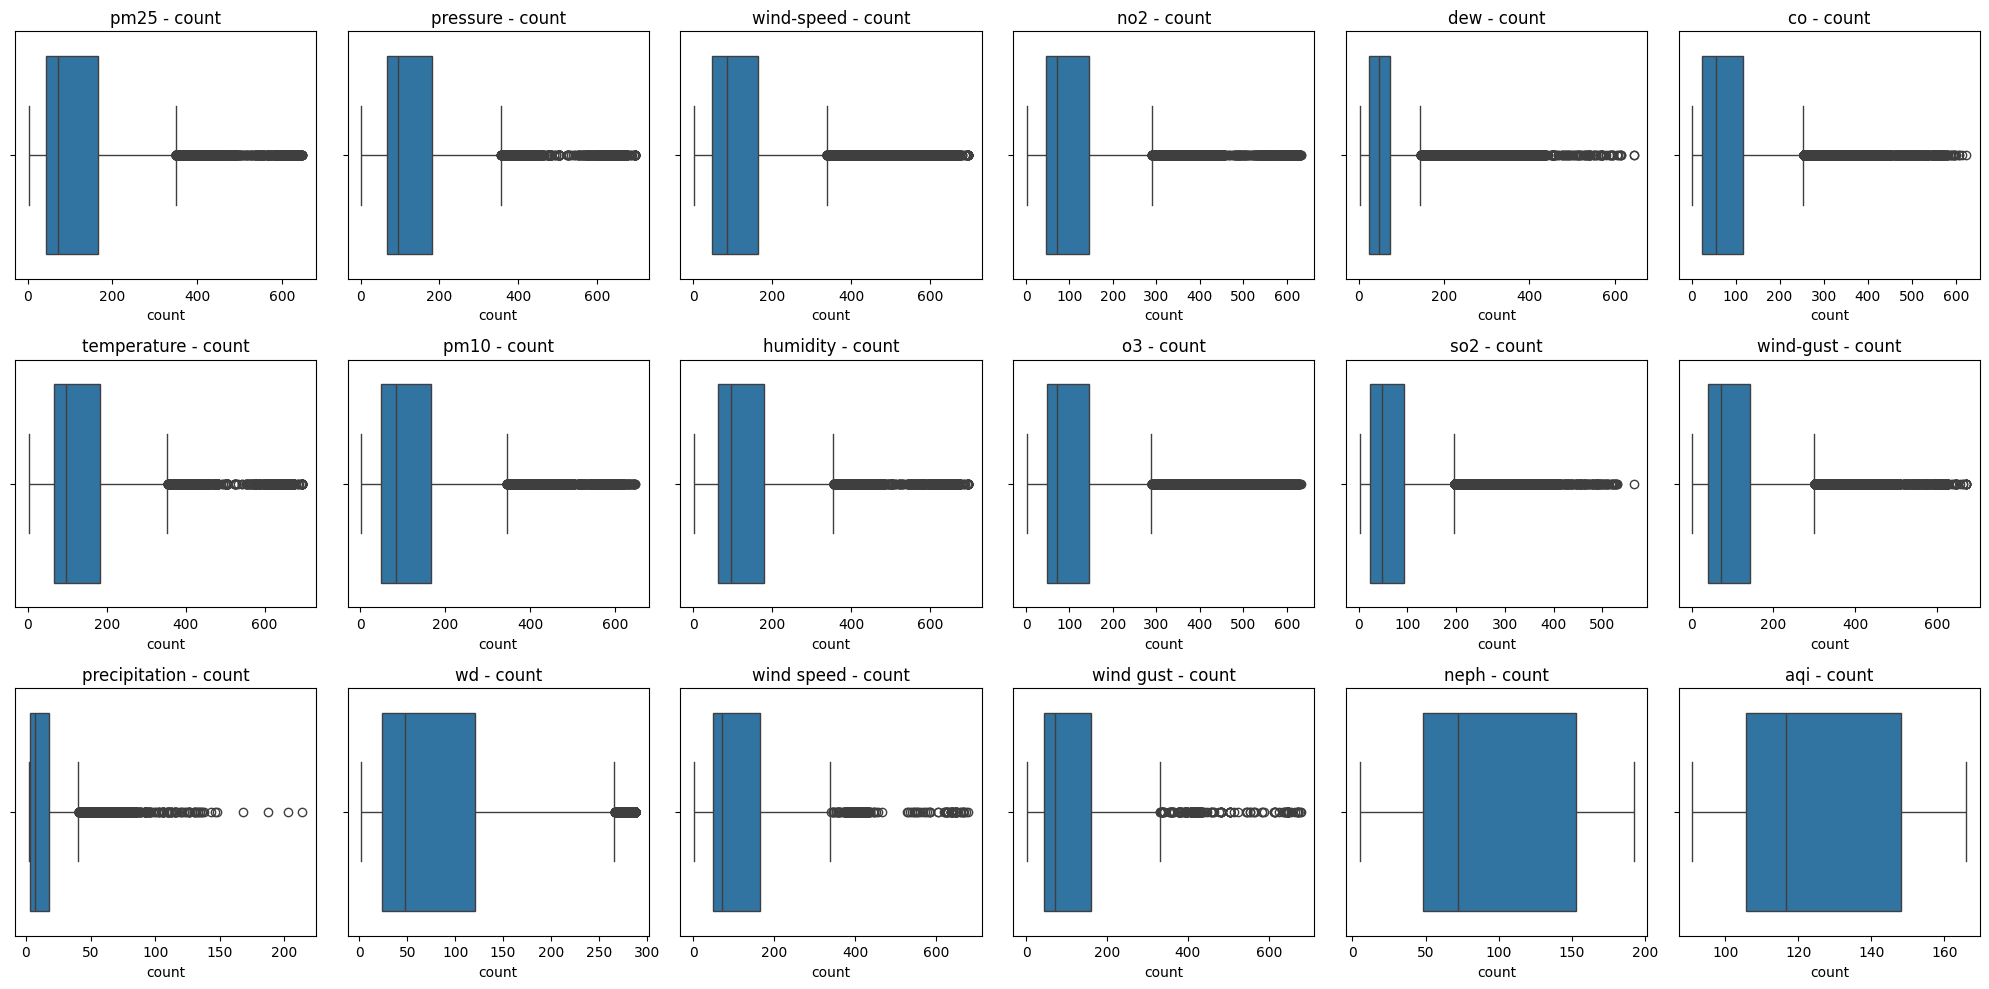

In [112]:
# Tracé des boxplots pour chaque variable

# Filtrer les données par chaque valeur unique de "Specie"
species = data['Specie'].unique()

fig, axs = plt.subplots(3, 6, figsize=(20, 10))
axs = axs.ravel()  # Aplatir la matrice de subplots en une liste

for i, specie in enumerate(species):
    specie_data = data[data['Specie'] == specie]
    sns.boxplot(x=specie_data['count'], ax=axs[i])
    axs[i].set_title(f'{specie} - count')
    axs[i].set_xlabel('count')
    axs[i].set_ylabel('')

# Si il y a moins de subplots que d'axes, cacher les axes restants
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

**Réalisation de l'ACP**

In [113]:
# Sélectionner uniquement les colonnes numériques (ici ce seront les colonnes des espèces)
df_numeric = pivot_data.select_dtypes(include=[np.number])

# Imputer les valeurs manquantes avec la moyenne de chaque colonne
imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df_numeric)

# Normaliser les données
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_imputed)

# Appliquer l'ACP
pca = PCA()
df_pca = pca.fit_transform(df_normalized)

# Création d'un DataFrame pour les résultats de l'ACP
df_pca_result = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])

# Afficher les variances expliquées par chaque composante principale
variance_explained = pca.explained_variance_ratio_
for i, var in enumerate(variance_explained, start=1):
    print(f"Variance expliquée par PC{i}: {var*100:.2f}%")

Variance expliquée par PC1: 9.92%
Variance expliquée par PC2: 9.11%
Variance expliquée par PC3: 8.22%
Variance expliquée par PC4: 7.88%
Variance expliquée par PC5: 6.76%
Variance expliquée par PC6: 6.18%
Variance expliquée par PC7: 5.66%
Variance expliquée par PC8: 5.56%
Variance expliquée par PC9: 5.51%
Variance expliquée par PC10: 5.45%
Variance expliquée par PC11: 5.30%
Variance expliquée par PC12: 4.93%
Variance expliquée par PC13: 4.29%
Variance expliquée par PC14: 3.80%
Variance expliquée par PC15: 3.04%
Variance expliquée par PC16: 2.93%
Variance expliquée par PC17: 2.76%
Variance expliquée par PC18: 2.70%


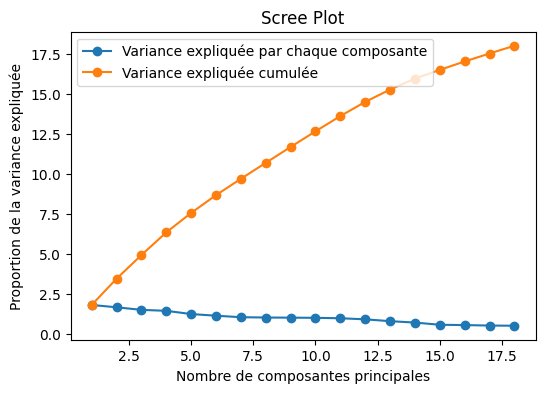

In [114]:
# Calculer la variance expliquée cumulée
explained_variance = pca.explained_variance_

cumulative_explained_variance = np.cumsum(explained_variance)

# Créer un scree plot avec la variance expliquée cumulée
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'o-', label='Variance expliquée par chaque composante')
plt.plot(range(1, len(explained_variance) + 1), cumulative_explained_variance, 'o-', label='Variance expliquée cumulée')
plt.title('Scree Plot')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Proportion de la variance expliquée')
plt.legend()
plt.show()

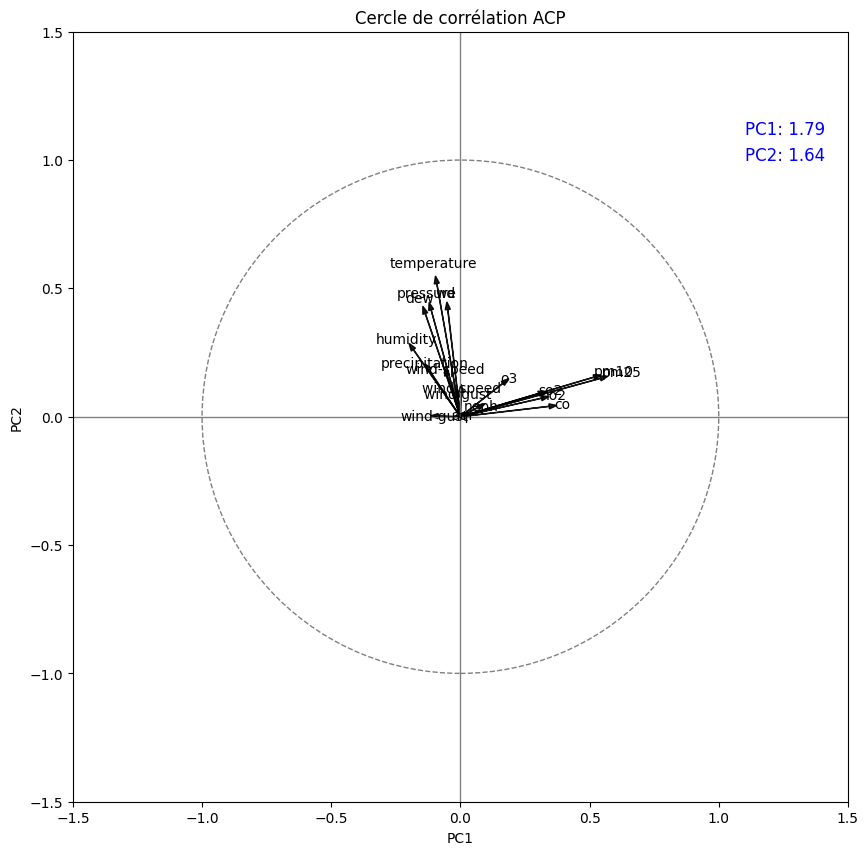

In [115]:
# Créer le cercle de corrélation
coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]

# Créer la figure
plt.figure(figsize=(10, 10))

# Placer les vecteurs des variables
for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='k', alpha=0.9, head_width=0.02)
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, df_numeric.columns[i], color='k', ha='center', va='center')

# Ajouter la variance expliquée par chaque plan factoriel
plt.text(1.1, 1.1, f'PC1: {explained_variance[0]:.2f}', fontsize=12, color='blue')
plt.text(1.1, 1.0, f'PC2: {explained_variance[1]:.2f}', fontsize=12, color='blue')

# Placer le cercle unitaire
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Ajuster les limites et les axes
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle de corrélation ACP')

# Afficher la figure
plt.show()

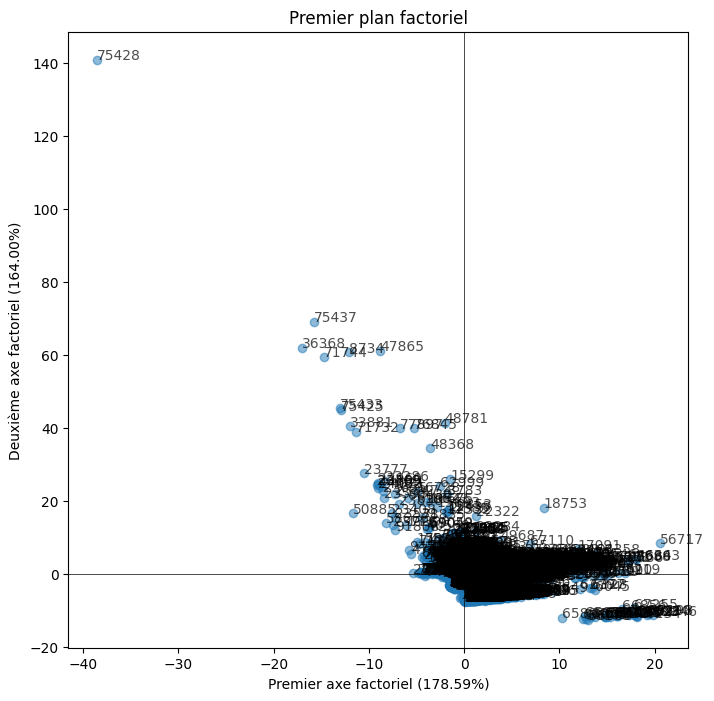

In [116]:
# Premier plan factoriel
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.5)

# Ajouter des étiquettes pour chaque point (index)
for i in range(df_pca.shape[0]):
    ax.annotate(str(i), (df_pca[i, 0], df_pca[i, 1]), alpha=0.7)

# Ajouter des axes
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)

# Labels des axes
ax.set_xlabel(f'Premier axe factoriel ({explained_variance[0]*100:.2f}%)')
ax.set_ylabel(f'Deuxième axe factoriel ({explained_variance[1]*100:.2f}%)')

# Titre du graphique
plt.title('Premier plan factoriel')

# Afficher le graphique
plt.show()

In [118]:
# Réduction de dimension avec PCA
pca = PCA(n_components=18)
df_pca = pca.fit_transform(df_normalized)

**CAH : CLASSIFICATION ASCENDANTE HIERARCHIQUE**

**Construction de la matrice des distances**

**Méthode du saut maximum** : Observez les distances verticales entre les fusions de clusters dans le dendrogramme. 
Recherchez les sauts les plus importants et identifiez le niveau de similarité / dissimilarité correspondant. 
Le nombre de clusters peut être déterminé par le nombre de sauts significatifs dans le dendrogramme.

In [119]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Exemple de sous-échantillonnage
sample_size = 12000 # Choisissez une taille d'échantillon appropriée

# Conversion en DataFrame pandas (à adapter selon votre cas)
df_normalized_df = pd.DataFrame(df_normalized, columns=df_numeric.columns)

# Sous-échantillonnage avec la méthode sample
df_sample = df_normalized_df.sample(n=sample_size, random_state=42)

print(df_normalized.shape)
# Calcul de la matrice de liaison avec l'échantillon et la méthode 'single'
linkage_matrix = linkage(df_sample, method='ward', metric='euclidean')

(101227, 18)


**Construction du dendogramme**

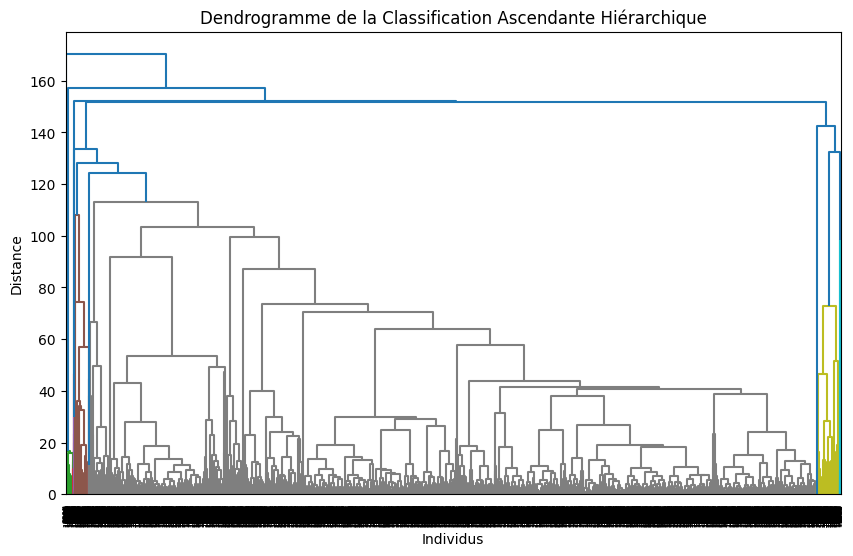

In [120]:
# Affichage du dendrogramme
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Dendrogramme de la Classification Ascendante Hiérarchique')
plt.xlabel('Individus')
plt.ylabel('Distance')
plt.show()

In [121]:
# Effectuer la CAH avec différentes coupes du dendrogramme
max_clusters = 10  # Nombre maximal de clusters à considérer
silhouette_scores = []

for num_clusters in range(2, max_clusters+1):
    clusters = fcluster(linkage(df_normalized, method='ward', metric='euclidean'), num_clusters, criterion='maxclust')
    silhouette_avg = silhouette_score(df_normalized, clusters)
    silhouette_scores.append(silhouette_avg)

# Tracer le graphique du score de silhouette moyen pour chaque nombre de clusters
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o')
plt.title("Score de silhouette moyen pour chaque nombre de clusters")
plt.xlabel("Nombre de clusters")
plt.ylabel("Score de silhouette moyen")
plt.show()

# Trouver le nombre optimal de clusters qui maximise le score de silhouette moyen
optimal_num_clusters = np.argmax(silhouette_scores) + 2  # +2 car on commence à 2 clusters
print("Nombre optimal de clusters :", optimal_num_clusters)

MemoryError: Unable to allocate 38.2 GiB for an array with shape (5123402151,) and data type float64

In [71]:
# Demander à l'utilisateur de choisir le nombre de clusters (ici fixé à 3)
num = int(input("Choisissez le nombre de cluster que vous désirez \n"))
num_clusters = num

# Effectuer la CAH avec le nombre de clusters choisi
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Ajouter les informations de cluster dans le DataFrame pivoté
pivot_data['Cluster'] = clusters

# Afficher les statistiques des clusters
cluster_stats = pivot_data.groupby('Cluster').mean()
cluster_stats

Choisissez le nombre de cluster que vous désirez 
 2


Specie,aqi,co,dew,humidity,neph,no2,o3,pm10,pm25,precipitation,pressure,so2,temperature,wd,wind gust,wind speed,wind-gust,wind-speed
Cluster,,,,,,,,,,,,,,,,,,
1,116.352941,70.682134,21.587730,29.680148,108.619048,101.675342,97.580049,119.943659,103.512025,11.462211,29.929717,65.662497,30.098194,24.860583,23.740360,24.809297,22.191447,22.459848
2,122.200000,91.076712,71.074581,142.636497,100.923831,116.345129,120.535703,124.825089,117.063813,12.811872,141.325233,74.420000,144.248807,89.924255,123.187817,128.684213,110.205447,127.083098


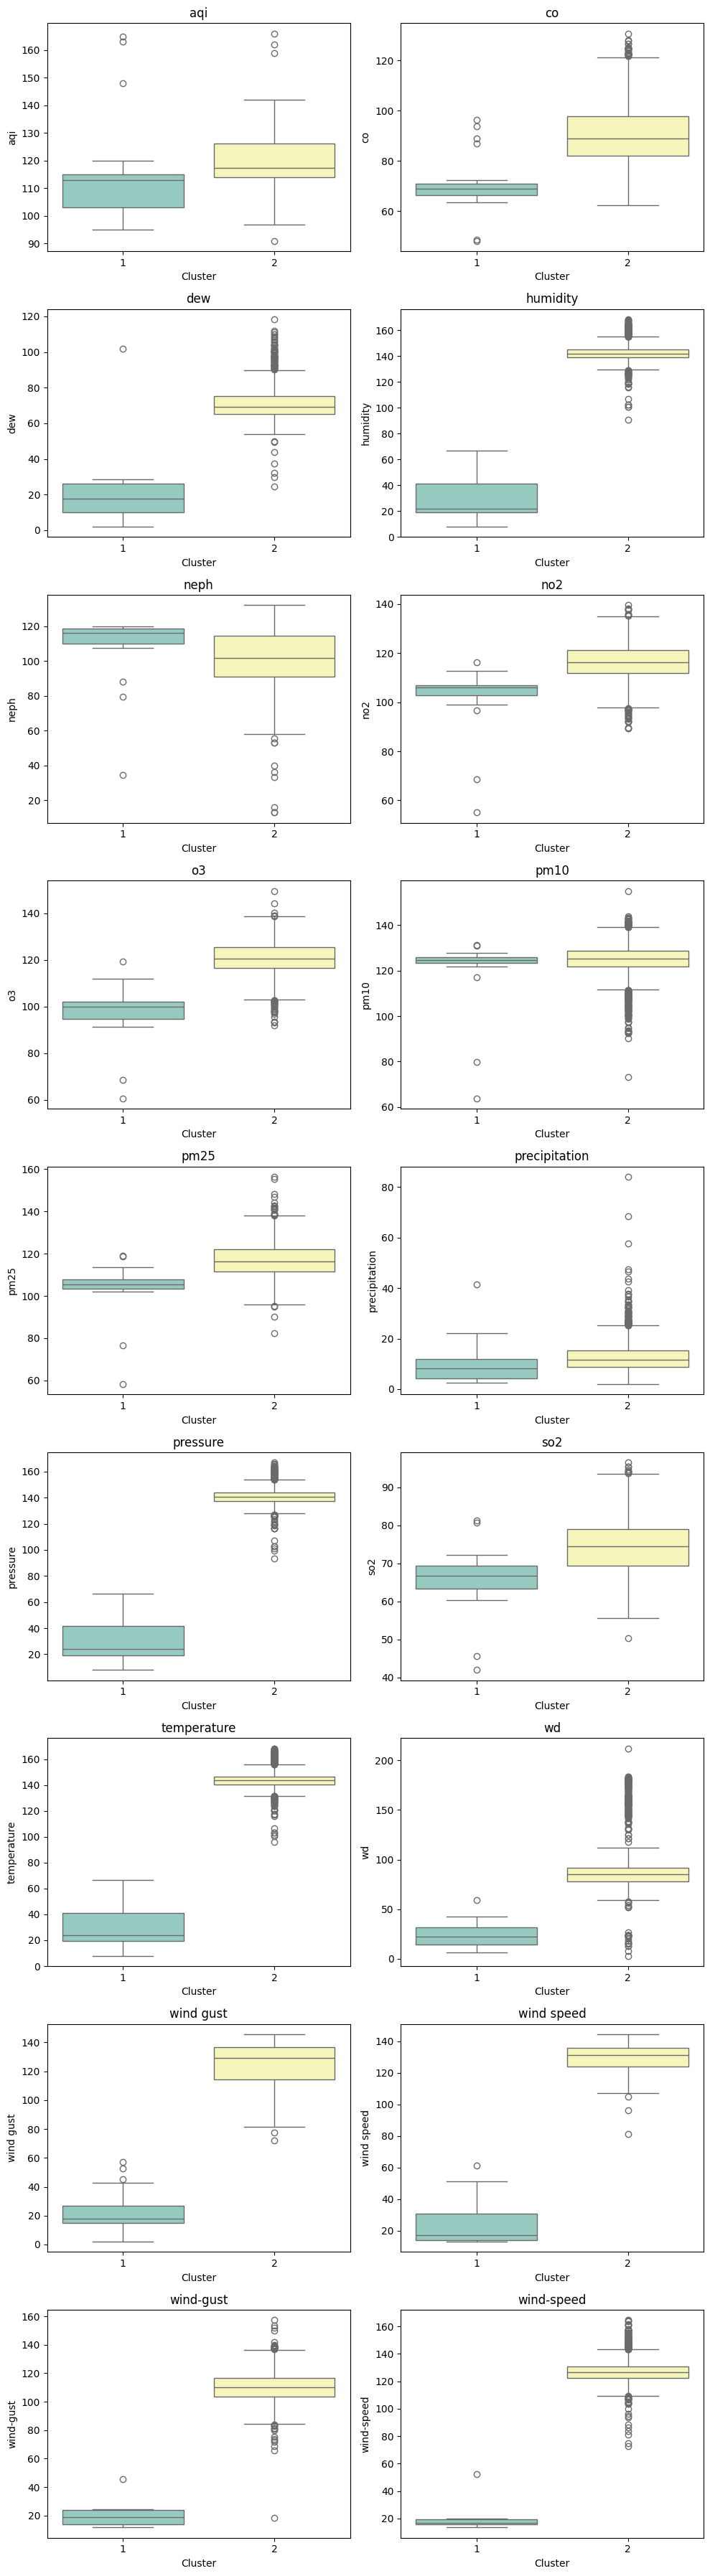

In [72]:
# Créer un DataFrame combiné pour inclure les clusters et les données numériques
df_combined = pivot_data.copy()
df_combined['Cluster'] = clusters

# Créer un boxplot pour chaque colonne numérique
num_cols = len(df_numeric.columns)

# Nombre de lignes pour les sous-graphiques
num_rows = num_cols // 2
if num_cols % 2:
    num_rows += 1

# Utiliser une palette de couleurs pour les clusters
palette = sns.color_palette("Set3", num_clusters)

plt.figure(figsize=(10, 4 * num_rows))
for i, column in enumerate(df_numeric.columns, start=1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(x='Cluster', y=column, data=df_combined, hue='Cluster', palette=palette, dodge=False)
    plt.title(column)
    plt.legend([],[], frameon=False)  # Supprimer la légende

plt.tight_layout()
plt.show()

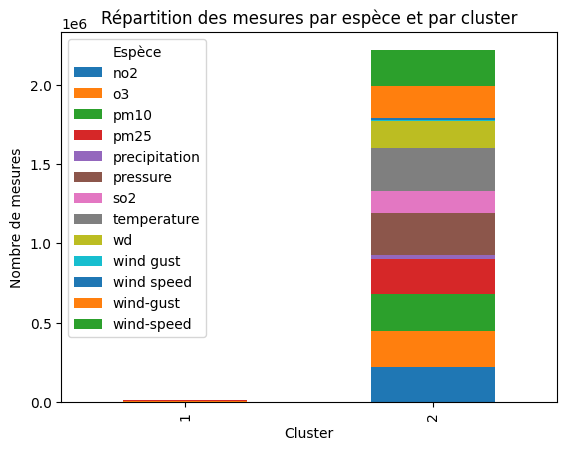

In [79]:
# Préparer les données pour la table de contingence en les rendant long-format
long_format_data = pd.melt(pivot_data, id_vars=['Cluster'], value_vars=pivot_data.columns[5:], var_name='Specie', value_name='count')

# Créer une table de contingence entre Cluster et les espèces
contingency_table = long_format_data.pivot_table(index='Cluster', columns='Specie', values='count', aggfunc='sum', fill_value=0)

# Tracer le barplot empilé
contingency_table.plot(kind='bar', stacked=True)

# Ajouter des étiquettes et des titres
plt.xlabel('Cluster')
plt.ylabel('Nombre de mesures')
plt.title('Répartition des mesures par espèce et par cluster')

# Afficher la légende
plt.legend(title='Espèce')

# Afficher le graphique
plt.show()

In [37]:
df_normalized_df.shape

(101227, 18)

In [39]:
df_normalized.shape

(101227, 18)

In [40]:
pivot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101227 entries, 0 to 101226
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   aqi            37 non-null     float64
 1   co             67555 non-null  float64
 2   dew            72248 non-null  float64
 3   humidity       99337 non-null  float64
 4   neph           2950 non-null   float64
 5   no2            87965 non-null  float64
 6   o3             77999 non-null  float64
 7   pm10           93369 non-null  float64
 8   pm25           83482 non-null  float64
 9   precipitation  14718 non-null  float64
 10  pressure       99394 non-null  float64
 11  so2            84256 non-null  float64
 12  temperature    99376 non-null  float64
 13  wd             20651 non-null  float64
 14  wind gust      3913 non-null   float64
 15  wind speed     4489 non-null   float64
 16  wind-gust      73893 non-null  float64
 17  wind-speed     93970 non-null  float64
dtypes: f

In [82]:
pivot_data_final.isnull().sum()

Specie
Date                      0
aqi_count              1866
co_count                  0
dew_count                11
humidity_count            4
                       ... 
wd_variance              17
wind gust_variance     1809
wind speed_variance    1810
wind-gust_variance       84
wind-speed_variance      84
Length: 73, dtype: int64

In [42]:
pivot_data.head()

Specie,aqi,co,dew,humidity,neph,no2,o3,pm10,pm25,precipitation,pressure,so2,temperature,wd,wind gust,wind speed,wind-gust,wind-speed
0,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,24.0,NaN,10.0,NaN,21.0,NaN,NaN,NaN,NaN,NaN
1,NaN,155.0,24.0,168.0,NaN,125.0,161.0,165.0,142.0,NaN,168.0,6.0,168.0,NaN,NaN,NaN,131.0,111.0
2,NaN,NaN,20.0,260.0,NaN,259.0,232.0,190.0,NaN,NaN,264.0,84.0,260.0,NaN,NaN,NaN,210.0,188.0
3,NaN,427.0,162.0,456.0,NaN,447.0,362.0,448.0,404.0,NaN,456.0,401.0,456.0,NaN,NaN,NaN,9.0,198.0
4,NaN,158.0,296.0,326.0,NaN,192.0,258.0,263.0,226.0,NaN,307.0,248.0,262.0,211.0,NaN,NaN,14.0,260.0


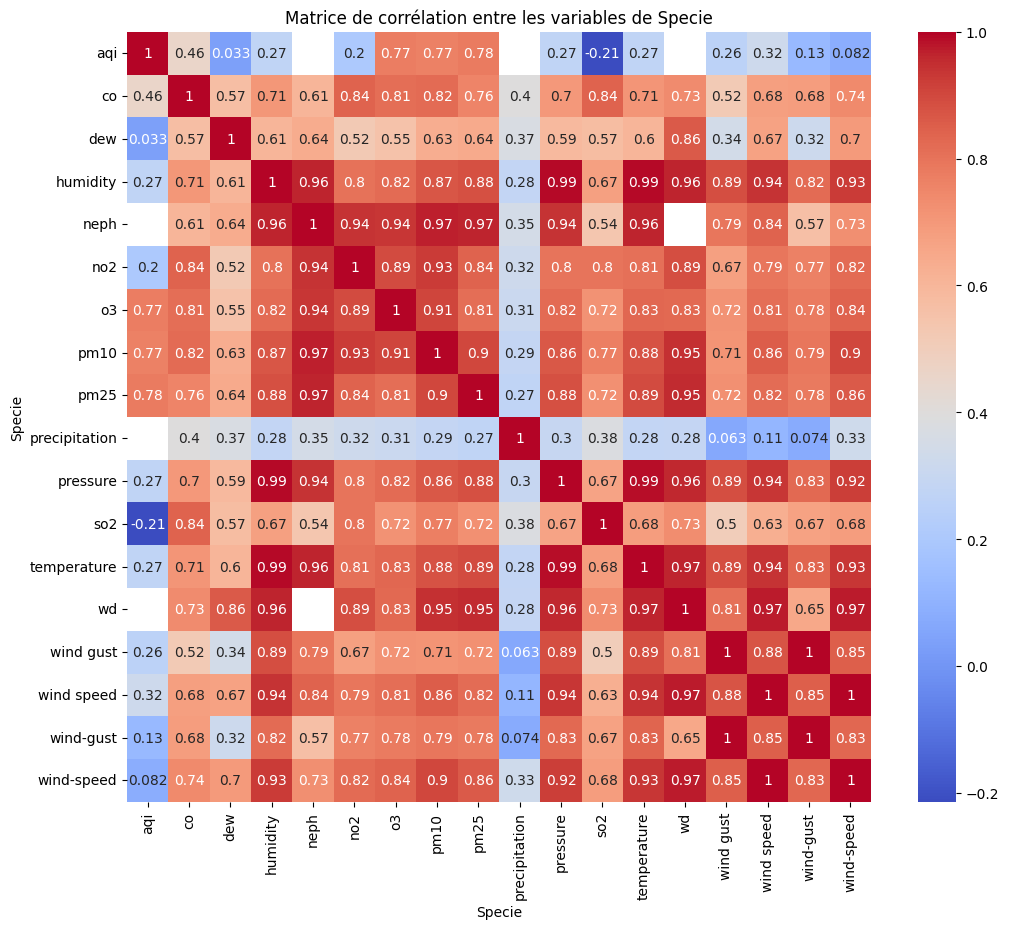

In [46]:
corr_matrix = pivot_data.corr()

corr_matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title('Matrice de corrélation entre les variables de Specie')
plt.show()

In [76]:
# Retrouver les lignes où toutes les colonnes sont NaN
all_nan_rows = data.dropna(how='all')

# Identifier les lignes qui sont supprimées
nan_rows_indices = pivot_data.index.difference(all_nan_rows.index)
nan_rows_indices

RangeIndex(start=0, stop=0, step=1)

In [77]:
nan_rows = data.loc[nan_rows_indices]
nan_rows

,Date,Country_Code,City,Specie,count,min,max,median,variance,Country_Name,Continent


In [117]:
pivot_data.shape

(101227, 20)